In [1]:
#reference: https://www.kaggle.com/benjibb/lstm-stock-prediction-20170507?scriptVersionId=1139231
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os

Using TensorFlow backend.


In [2]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns) # 5
    data = stock.as_matrix() 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days
    
    result = np.array(result)
    print(result.shape)
    row = round(0.9 * result.shape[0]) # 90% split
    train = result[:int(row), :] # 90% date, all features 
    
    x_train = train[:, :-1] 
    y_train = train[:, -1][:,-1]
    print(x_train.shape)
    print(y_train.shape)
    
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]
    print(x_test.shape)
    print(y_test.shape)

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [3]:
def hit_ratio(realvalue,predction):
    ratio = 0.0
    
    return ratio

In [4]:
df = pd.read_csv("prices-split-adjusted.csv", index_col = 0)
df["adj close"] = df.close # Moving close to the last column
df.drop(['close'], 1, inplace=True) # Moving close to the last column
df.head()
# print set(df.symbol)

,symbol,open,low,high,volume,adj close
date,,,,,,
2016-01-05,WLTW,123.430000,122.309998,126.250000,2163600.0,125.839996
2016-01-06,WLTW,125.239998,119.940002,125.540001,2386400.0,119.980003
2016-01-07,WLTW,116.379997,114.930000,119.739998,2489500.0,114.949997
2016-01-08,WLTW,115.480003,113.500000,117.440002,2006300.0,116.620003
2016-01-11,WLTW,117.010002,114.089996,117.330002,1408600.0,114.970001


In [5]:
from sklearn import preprocessing
def normalize_data(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['volume'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))
    df['adj close'] = min_max_scaler.fit_transform(df['adj close'].values.reshape(-1,1))
    return df
df = normalize_data(df)
df.head()

,symbol,open,low,high,volume,adj close
date,,,,,,
2016-01-05,WLTW,0.076934,0.078020,0.077818,0.002517,0.078812
2016-01-06,WLTW,0.078078,0.076490,0.077374,0.002776,0.075095
2016-01-07,WLTW,0.072480,0.073254,0.073747,0.002896,0.071904
2016-01-08,WLTW,0.071911,0.072331,0.072309,0.002334,0.072964
2016-01-11,WLTW,0.072878,0.072712,0.072240,0.001639,0.071917


In [6]:
symbols = list(set(df.symbol))
stock_interest = 'AAPL'
len(symbols)
df3 = df[df.symbol == stock_interest]
df3.drop(['symbol'],1,inplace=True)
print (df3.head())
df4 = df[df.symbol == 'GOOG']
df4.drop(['symbol'],1,inplace=True)
print (df4.head())

                open       low      high    volume  adj close
date                                                         
2010-01-04  0.018215  0.018625  0.018030  0.143586   0.018384
2010-01-05  0.018320  0.018705  0.018128  0.175045   0.018417
2010-01-06  0.018301  0.018475  0.018096  0.160578   0.018108
2010-01-07  0.018063  0.018318  0.017807  0.138758   0.018073
2010-01-08  0.017932  0.018319  0.017807  0.130173   0.018200
                open       low      high    volume  adj close
date                                                         
2010-01-04  0.196265  0.199850  0.194964  0.004568   0.197023
2010-01-05  0.196338  0.198981  0.194443  0.007017   0.196151
2010-01-06  0.195922  0.194098  0.193827  0.009291   0.191181
2010-01-07  0.190742  0.189687  0.188886  0.014979   0.186707
2010-01-08  0.185266  0.188548  0.186783  0.011032   0.189210


/Users/sophiawj/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/sophiawj/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
symbols = list(set(df.symbol))
stock_interest = 'GOOG'
len(symbols)
df2 = df[df.symbol == stock_interest]
df2.drop(['symbol'],1,inplace=True)
print (df2.head())
df = df[df.symbol == stock_interest]
df.drop(['symbol'],1,inplace=True)
print (df.head())

                open       low      high    volume  adj close
date                                                         
2010-01-04  0.196265  0.199850  0.194964  0.004568   0.197023
2010-01-05  0.196338  0.198981  0.194443  0.007017   0.196151
2010-01-06  0.195922  0.194098  0.193827  0.009291   0.191181
2010-01-07  0.190742  0.189687  0.188886  0.014979   0.186707
2010-01-08  0.185266  0.188548  0.186783  0.011032   0.189210
                open       low      high    volume  adj close
date                                                         
2010-01-04  0.196265  0.199850  0.194964  0.004568   0.197023
2010-01-05  0.196338  0.198981  0.194443  0.007017   0.196151
2010-01-06  0.195922  0.194098  0.193827  0.009291   0.191181
2010-01-07  0.190742  0.189687  0.188886  0.014979   0.186707
2010-01-08  0.185266  0.188548  0.186783  0.011032   0.189210


/Users/sophiawj/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
# df3 = normalize_data(df3)
# df3.head()
# df4 = normalize_data(df4)
# df4.head()

In [9]:
print (df.shape)
print (df2.shape)
df = normalize_data(df)
df.head()
df2 = normalize_data(df2)
df2.head()

(1762, 5)
(1762, 5)


,open,low,high,volume,adj close
date,,,,,
2010-01-04,0.157047,0.161167,0.156390,0.131722,0.159399
2010-01-05,0.157238,0.158884,0.154995,0.202469,0.157092
2010-01-06,0.156140,0.146049,0.153341,0.268184,0.143942
2010-01-07,0.142436,0.134457,0.140094,0.432522,0.132105
2010-01-08,0.127950,0.131464,0.134455,0.318492,0.138726


In [10]:
def build_model(layers):
    d = 0.3
    model = Sequential()
    
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
        
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    # adam = keras.optimizers.Adam(decay=0.2)
        
    start = time.time()
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

In [12]:
window = 22
X_train, y_train, X_test, y_test = load_data(df2, window)
print(X_train.shape)
print(y_train.shape)
# print (X_train[0], y_train[0])

(1739, 23, 5)
(1565, 22, 5)
(1565,)
(174, 22, 5)
(174,)
(1565, 22, 5)
(1565,)


In [15]:
model = build_model([5,window,1])
model.fit(X_train,y_train,batch_size=512,epochs=90,validation_split=0.1,verbose=1)

Compilation Time :  0.028599977493286133
Train on 1408 samples, validate on 157 samples
Epoch 1/90
1408/1408 [==============================] - 8s 5ms/step - loss: 0.1276 - acc: 7.1023e-04 - val_loss: 0.5041 - val_acc: 0.0000e+00
Epoch 2/90
1408/1408 [==============================] - 7s 5ms/step - loss: 0.0581 - acc: 7.1023e-04 - val_loss: 0.0336 - val_acc: 0.0000e+00
Epoch 3/90
1408/1408 [==============================] - 7s 5ms/step - loss: 0.0344 - acc: 7.1023e-04 - val_loss: 0.1256 - val_acc: 0.0000e+00
Epoch 4/90
1408/1408 [==============================] - 7s 5ms/step - loss: 0.0147 - acc: 7.1023e-04 - val_loss: 0.1904 - val_acc: 0.0000e+00
Epoch 5/90
1408/1408 [==============================] - 7s 5ms/step - loss: 0.0165 - acc: 7.1023e-04 - val_loss: 0.0965 - val_acc: 0.0000e+00
Epoch 6/90
1408/1408 [==============================] - 7s 5ms/step - loss: 0.0056 - acc: 7.1023e-04 - val_loss: 0.0364 - val_acc: 0.0000e+00
Epoch 7/90
1408/1408 [==============================] - 7s 5

Epoch 58/90
1408/1408 [==============================] - 9s 7ms/step - loss: 0.0011 - acc: 7.1023e-04 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 59/90
1408/1408 [==============================] - 9s 7ms/step - loss: 0.0011 - acc: 7.1023e-04 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 60/90
1408/1408 [==============================] - 8s 6ms/step - loss: 0.0012 - acc: 7.1023e-04 - val_loss: 0.0070 - val_acc: 0.0000e+00
Epoch 61/90
1408/1408 [==============================] - 7s 5ms/step - loss: 9.9504e-04 - acc: 7.1023e-04 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 62/90
1408/1408 [==============================] - 8s 6ms/step - loss: 9.7314e-04 - acc: 7.1023e-04 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 63/90
1408/1408 [==============================] - 8s 5ms/step - loss: 9.8187e-04 - acc: 7.1023e-04 - val_loss: 0.0062 - val_acc: 0.0000e+00
Epoch 64/90
1408/1408 [==============================] - 8s 6ms/step - loss: 0.0011 - acc: 7.1023e-04 - val_loss: 0.0080 - val_acc

In [16]:
# print(X_test[-1])
diff=[]
ratio=[]
p = model.predict(X_test)
print (p.shape)
# for each data index in test data
for u in range(len(y_test)):
    # pr = prediction day u
    pr = p[u][0]
    # (y_test day u / pr) - 1
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
    # print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))
    # Last day prediction
    # print(p[-1]) 

(174, 1)


In [17]:
df = pd.read_csv("prices-split-adjusted.csv", index_col = 0)
df["adj close"] = df.close # Moving close to the last column
df.drop(['close'], 1, inplace=True) # Moving close to the last column
df = df[df.symbol == stock_interest]
df.drop(['symbol'],1,inplace=True)

# Bug fixed at here, please update the denormalize function to this one
def denormalize(df, normalized_value): 
    df = df['adj close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

newp = denormalize(df, p)
newy_test = denormalize(df, y_test)

In [18]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]


model_score(model, X_train, y_train, X_test, y_test)



Train Score: 0.00125 MSE (0.04 RMSE)
Test Score: 0.00493 MSE (0.07 RMSE)


(0.0012544785633671304, 0.0049339870376319721)

In [19]:
def trend_score(actual, pred):
    trendScore = 0
    for i in range(len(actual)-1):
        if ((actual[i+1]-actual[i])*(pred[i+1]-actual[i])>0):
            trendScore=trendScore+1
    return trendScore/(len(actual)-1)

trScore = trend_score(newy_test, newp)    
print(trScore)

0.4913294797687861


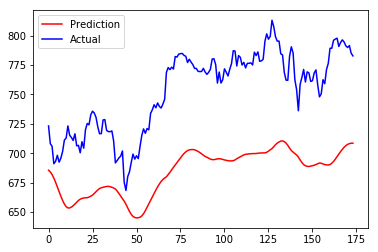

In [22]:
import matplotlib.pyplot as plt2

plt2.plot(newp,color='red', label='Prediction')
plt2.plot(newy_test,color='blue', label='Actual')
plt2.legend(loc='best')
plt2.show()

In [24]:
print (stock_interest)

GOOG


In [26]:
import statsmodels.api as sm
import statsmodels.api as sm
res = sm.tsa.arma_order_select_ic(y_train, ic=['aic', 'bic'], trend='nc')
print (res.aic_min_order)
print (res.bic_min_order)

/Users/sophiawj/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/sophiawj/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/sophiawj/anaconda/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/Users/sophiawj/anaconda/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/Users/sophiawj/anaconda/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/Users/sophiawj/anaconda

(1, 1)
(1, 1)


/Users/sophiawj/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [28]:
print (y_train.shape)
print (y_test.shape)
y_all = list(y_train).append(list(y_test))

(1565,)
(174,)


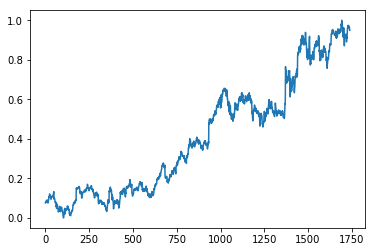

In [29]:
# print list(y_train)
y_all = np.zeros(1565+174)
y_all[:1565] = y_train
y_all[1565:] = y_test
plt2.plot(y_all)
plt2.show()

/Users/sophiawj/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/sophiawj/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


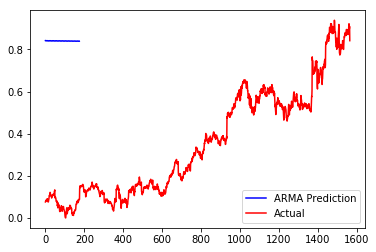

In [30]:
from statsmodels.tsa.arima_model import ARMA
my_order = res.aic_min_order
arma_model = ARMA(y_train,(3,2),freq = 'Q').fit()
arma_y = arma_model.predict(start = 1565,end = 1565+174,dynamic=True)

# arma_y = arma_model.predict(start = 4,end = 1700)
plt2.figure(2)
plt2.plot(arma_y,color='blue', label='ARMA Prediction')
plt2.plot(y_train,color='red', label='Actual')
plt2.legend(loc='best')
plt2.show()

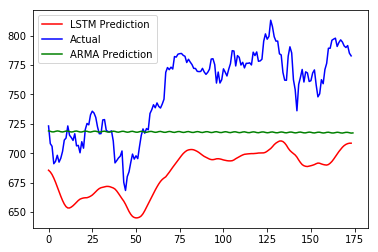

In [31]:
# arma_model.fit()
# arma_y = arma_model.predict(start = 1,end = 1700,exog = y_train)
arma_pred = denormalize(df, arma_y)
# import matplotlib.pyplot as plt2

plt2.plot(newp,color='red', label='LSTM Prediction')
plt2.plot(newy_test,color='blue', label='Actual')
plt2.plot(arma_pred,color='green', label='ARMA Prediction')
plt2.legend(loc='best')
plt2.show()

174
175
[ 0.84197758  0.84138016  0.84061583  0.84061438  0.84136214  0.84192171
  0.84159054  0.8407665   0.84045397  0.84102362]
[ 0.87076446  0.88249493  0.8969774   0.89946115  0.90919449  0.92196531
  0.90068618  0.89857168  0.90942946]
[ 0.07582908  0.07959922  0.08142161  0.0839044   0.08224082  0.08387095
  0.08112903  0.08796707  0.08538401  0.08957211]
1565


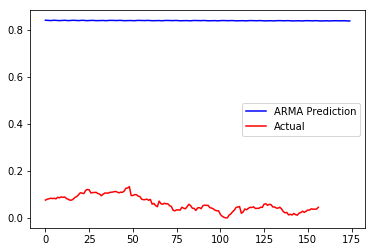

In [32]:
print (len(y_test))
print (len(arma_y))
print (arma_y[:10])
print (y_train[-10:-1])
print (y_train[:10])
print (len(y_train))
plt2.figure(2)
plt2.plot(arma_y,color='blue', label='ARMA Prediction')
plt2.plot(y_train[:157],color='red', label='Actual')
plt2.legend(loc='best')
plt2.show()
                